In [1]:
import lhapdf
#import ROOT
import math
import json
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
plt.rcParams['text.usetex'] = True

LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/cteq6l1/cteq6l1_0000.dat
Q2 is cteq6l1 PDF set, member #0, version 4; LHAPDF ID = 10042
LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/cteq6l1/cteq6l1_0000.dat
cteq6l1 PDF set, member #0, version 4; LHAPDF ID = 10042
 4
Q2 is  4.75
Q2 is  5.5


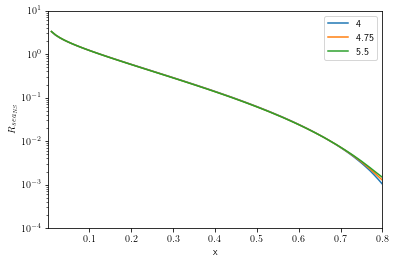

In [2]:
## Getting a PDF member object
p_cteq6 = lhapdf.mkPDF("cteq6l1", 0)
p_cteq6 = lhapdf.mkPDF("cteq6l1/0")
Q2s = [4,4.75,5.5]
for i in range(len(Q2s)):
    Q2 = Q2s[i]
    Q=math.sqrt(Q2)
    print("Q2 is ",Q2)
    x_axis = np.arange(0.01,0.99,0.01)
    y_dv=[]
    y_uv=[]
    y_dbar=[]
    y_ubar=[]
    for x in np.arange(0.01,0.99,0.01):
        y_dv.append(p_cteq6.xfxQ(1,x,Q))
        y_uv.append(p_cteq6.xfxQ(2,x,Q))
        y_dbar.append(p_cteq6.xfxQ(-1,x,Q))
        y_ubar.append(p_cteq6.xfxQ(-2,x,Q))
    u_bar=np.asarray(y_ubar)
    d_bar=np.asarray(y_dbar)
    u_v=np.asarray(y_uv)
    d_v=np.asarray(y_dv)
    R_sea_NS=5*(u_bar+d_bar)/(u_v+d_v)
    Bxz=R_sea_NS
    #fig = plt.figure()
    #ax = fig.add_subplot()
    plt.plot(x_axis,Bxz,label=Q2)
    plt.yscale('log')
    #ax.set_yscale("log")
    plt.ylim(1e-4,1e1)
    plt.xlim(0.001,0.8)
    plt.xlabel("x")
    plt.ylabel(r"$R_{sea_{NS}}$")
    plt.legend()
    plt.savefig("Rsea_NS")


Q2 is  4
Q2 is  4.75
Q2 is  5.5


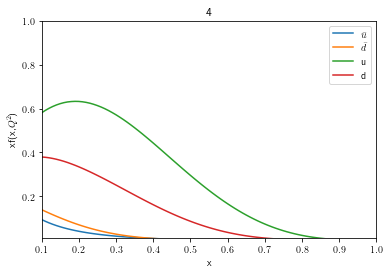

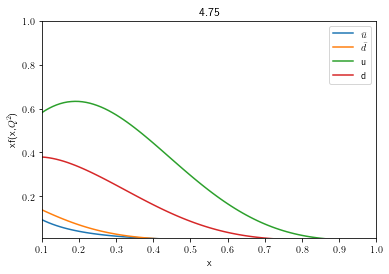

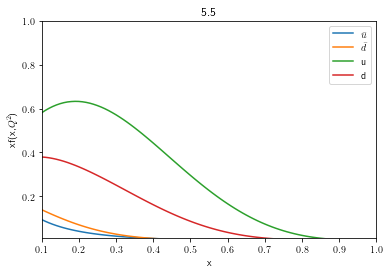

In [3]:
for i in range(len(Q2s)):
    Q2 = Q2s[i]
    Q=math.sqrt(Q2)
    print("Q2 is ",Q2)
    fig = plt.figure()
    ax = fig.add_subplot()
    plt.plot(x_axis,y_ubar,label=r"$\bar u$")
    plt.plot(x_axis,y_dbar,label=r"$\bar d$")
    #plt.plot(x_axis,y_g,label="g")
    plt.plot(x_axis,y_uv,label="u")
    plt.plot(x_axis,y_dv,label="d")
    #plt.plot(x_axis,y_s,label="s")
    #ax.set_yscale("log")
    #ax.set_xscale("log")
    plt.ylim(1e-2,1e0)
    plt.xlim(1e-1,1e0)
    plt.xlabel("x")
    plt.ylabel(r"xf(x,$Q^2$)")
    ax.set_title(Q2)
    plt.legend()
    plt.savefig('cteqPDFs.png')

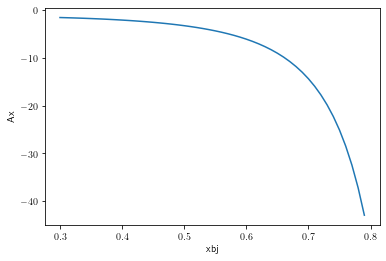

In [4]:
def Ax(xbj,Q,p_cteq6):
    return -4/(3*(p_cteq6.xfxQ(2,xbj,Q)+p_cteq6.xfxQ(1,xbj,Q)))
x_axis = np.arange(0.3,0.8,0.01)
Q2 = [4,4.75,5,5.75,6.09]
Q=math.sqrt(Q2[0])
Axs = []
for xi in x_axis:
    #plt.plot(xi,Ax(xi,Q,p_cteq6),"bo")
    Axs.append(Ax(xi,Q,p_cteq6))
    plt.xlabel("xbj")
    plt.ylabel("Ax")
plt.plot(x_axis,Axs)
plt.savefig("Ax_CSV")

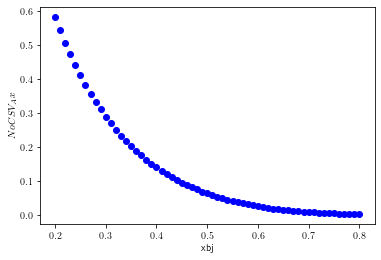

In [5]:
def NoCSV_Ax(xbj,Q,p_cteq6):
    return (5*(p_cteq6.xfxQ(-2,xbj,Q)+p_cteq6.xfxQ(-1,xbj,Q)))/(p_cteq6.xfxQ(2,xbj,Q)+p_cteq6.xfxQ(1,xbj,Q))      
x_axis = np.arange(0.01,0.99,0.01)
Q2 = [4,4.75,5,5.75,6.09]
Q=math.sqrt(Q2[0])
for xi in np.arange(0.2,0.8,0.01):
    plt.plot(xi,NoCSV_Ax(xi,Q,p_cteq6),"bo")
    plt.xlabel("xbj")
    plt.ylabel(r"$NoCSV_Ax$")

0.0 0.0


/opt/homebrew/lib/python3.9/site-packages/iminuit/cost.py:51: RuntimeWarning: divide by zero encountered in true_divide
  z = (y - ym) / ye


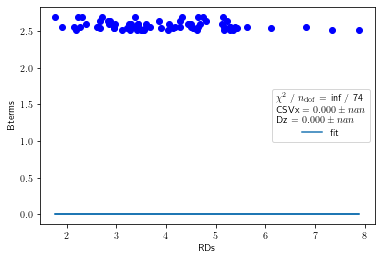

In [6]:
from iminuit.cost import LeastSquares
from iminuit import Minuit
with open('yield_ratio_weighted.json') as j_ratio:
    yield_ratio = json.load(j_ratio)
def RDline(RD,CSVx,Dz):
    return Dz*RD+CSVx   
def Bx(xbj,Q,p_cteq6):
    return 2.5+5*(p_cteq6.xfxQ(-2,xbj,Q)+p_cteq6.xfxQ(-1,xbj,Q))/(p_cteq6.xfxQ(1,xbj,Q)+p_cteq6.xfxQ(2,xbj,Q))
def Ax(xbj,Q,p_cteq6):
    return -4/(3*(p_cteq6.xfxQ(2,xbj,Q)+p_cteq6.xfxQ(1,xbj,Q)))


RDs=[]
Bterms=[]
xs = []
zs =[]
RDs_error =[]
for key_Q2,Q2_value in yield_ratio.items():
    Q2 = float(key_Q2)
    Q = math.sqrt(Q2)
    for key_xbj,xbj_value in Q2_value.items():
        xbj = float(key_xbj) 
        Bterm = Bx(xbj,Q,p_cteq6)
        Aterm = Ax(xbj,Q,p_cteq6)
        for key_z,z_value in xbj_value.items():
            xs.append(xbj)
            z_hadron = float(key_z)
            zs.append(z_hadron)
            RD=float(z_value["value_ratio"])
            RD_error = float(z_value["error_ratio"])
            RDs.append(float(z_value["value_ratio"]))
            RDs_error.append(float(z_value["error_ratio"]))
            Bterms.append(Bterm)
        
plt.plot(RDs,Bterms,"bo")
plt.xlabel("RDs")
plt.ylabel("Bterms")
least_squares = LeastSquares(RDs,Bterms,0,RDline)
m = Minuit(least_squares,CSVx = 0,Dz = 0)
m.migrad() #finds minum of least-squares function
m.hesse() #accurately computes uncertainties
print(*m.values)
Bterms_fit = []
for RD in RDs:
    Bterms_fit.append(RDline(RD,*m.values))
plt.plot(RDs,Bterms_fit,label="fit")
fit_info = [
    f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m.fval:.1f} / {len(RDs) - m.nfit}",
]
for p, v, e in zip(m.parameters, m.values, m.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")

plt.legend(title="\n".join(fit_info))


3.898000:0.450000,
3.979000:0.500000,
4.000000:0.350000,0.400000,
4.750000:0.450000,
4.764000:0.550000,
4.775000:0.600000,
5.000000:0.500000,
5.500000:0.500000,0.550000,0.600000,0.650000,

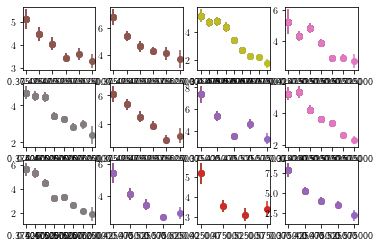

In [7]:

with open('yield_ratio_weighted.json') as j_ratio:
    yield_ratio = json.load(j_ratio)
    
figure, axis = plt.subplots(3,4)
x_plot=[0,0,0,0,1,1,1,1,2,2,2,2]
y_plot=[0,1,2,3,0,1,2,3,0,1,2,3]
xy_N=0
for keyQ2, value_Q2 in yield_ratio.items():
    print()
    Q2 = keyQ2
    print(Q2+':',end = '')
    for keyxbj,value_Q2xbj in value_Q2.items():
        xbj=keyxbj
        print(xbj+',',end = '')
        zs=[]
        yield_ratio=[]
        yield_ratio_error=[]
        
        for keyz,value_Q2xbjz in value_Q2xbj.items():
            z_ratio=keyz
            zs.append(z_ratio)
            yield_ratio.append(value_Q2xbjz["value_ratio"])
            yield_ratio_error.append(value_Q2xbjz["error_ratio"])
            axis[x_plot[xy_N],y_plot[xy_N]].errorbar(zs,yield_ratio,yield_ratio_error,fmt='o')
            
        xy_N += 1
plt.show()      


3.898:0.45,0.09455780613559209NoCSV_Axi,0.33867444245871065 0.8905174376552798 0.09455780613559209


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_49520/1142608305.py:49: IMinuitWarning: errordef not set, using 1 (appropriate for least-squares)
  m_Q2x.migrad()


<Figure size 432x288 with 0 Axes>

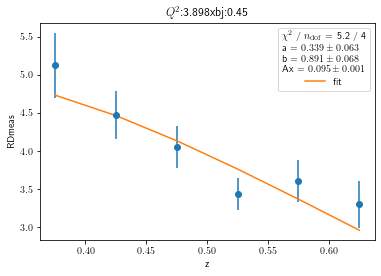


3.979:0.5,0.06239537229153171NoCSV_Axi,0.19186257025201947 0.889393226209133 0.06239537229153171


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_49520/1142608305.py:49: IMinuitWarning: errordef not set, using 1 (appropriate for least-squares)
  m_Q2x.migrad()


<Figure size 432x288 with 0 Axes>

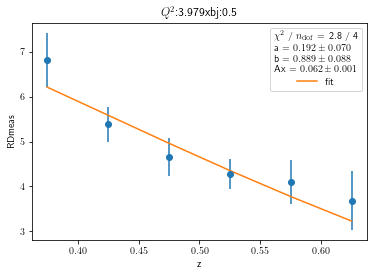


4.0:0.35,0.20174903435548727NoCSV_Axi,0.25316304162026426 1.0018563352653502 0.20174903435548727


<Figure size 432x288 with 0 Axes>

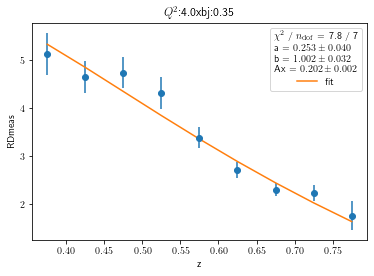

0.4,0.13926379423697574NoCSV_Axi,0.2654384775442319 0.8945437013045496 0.13926379423697574


<Figure size 432x288 with 0 Axes>

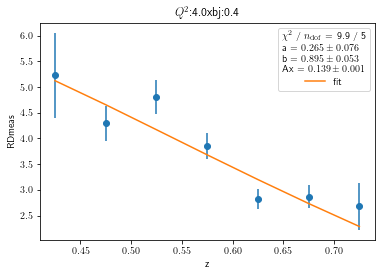


4.75:0.45,0.09358340001060036NoCSV_Axi,0.347234852679385 0.8868766064504712 0.09358340001060036


<Figure size 432x288 with 0 Axes>

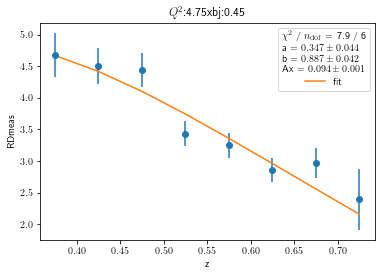


4.764:0.55,0.03943422941599469NoCSV_Axi,0.1226893235283282 1.0302132344214079 0.03943422941599469


<Figure size 432x288 with 0 Axes>

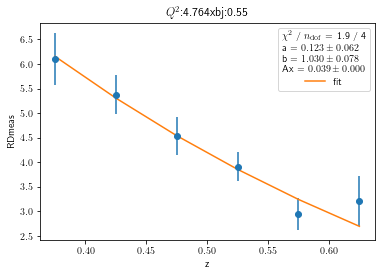


4.775:0.6,0.02403639387621469NoCSV_Axi,0.01349795874409342 1.1908152776936773 0.02403639387621469


<Figure size 432x288 with 0 Axes>

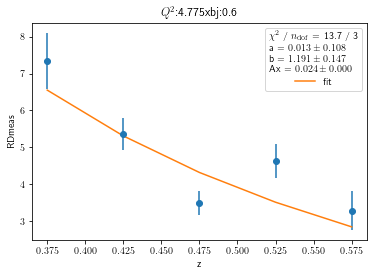


5.0:0.5,0.06165038985473308NoCSV_Axi,0.20215861302416735 1.002268233066377 0.06165038985473308


<Figure size 432x288 with 0 Axes>

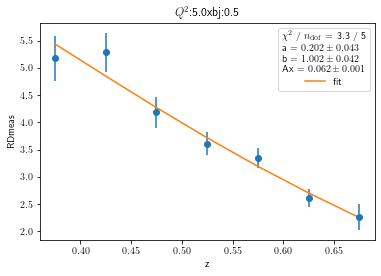


5.5:0.5,0.061347319508301384NoCSV_Axi,0.15460554661044865 1.0475301178682728 0.061347319508301384


<Figure size 432x288 with 0 Axes>

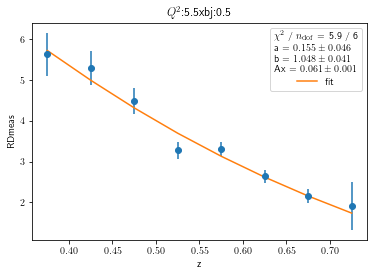

0.55,0.039152027323778905NoCSV_Axi,0.0694142147947319 1.1509921232612412 0.039152027323778905


<Figure size 432x288 with 0 Axes>

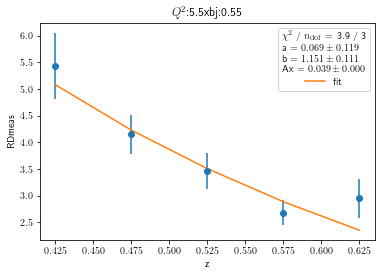

0.6,0.023893376194463557NoCSV_Axi,0.2029244420106733 1.0653677839878353 0.023893376194463557


<Figure size 432x288 with 0 Axes>

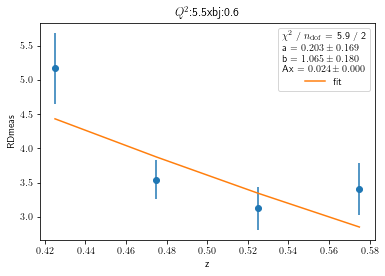

0.65,0.01371441793409612NoCSV_Axi,-0.1404043633158446 1.387256172348569 0.01371441793409612


<Figure size 432x288 with 0 Axes>

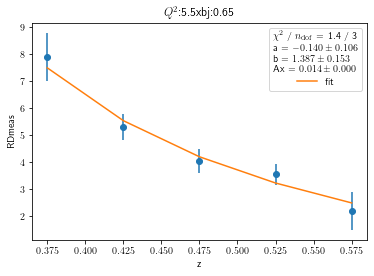

In [8]:
def NoCSV_Ax(xbj,Q,p_cteq6):
    return (5*(p_cteq6.xfxQ(-2,xbj,Q)+p_cteq6.xfxQ(-1,xbj,Q)))/(p_cteq6.xfxQ(2,xbj,Q)+p_cteq6.xfxQ(1,xbj,Q))
def RDmeas_noCSV(z_had,a,b,Ax):
    #delta_z = a+b*z_had
    #delta_z = a+b*z_had/(1+z_had)
    delta_z = z_had**a*(1-z_had)**b
    return (5*delta_z)/(1-delta_z)+Ax*(1+delta_z)/(1-delta_z)
            
with open('yield_ratio_weighted.json') as j_ratio:
    yield_ratio = json.load(j_ratio)


for keyQ2, value_Q2 in yield_ratio.items():
    print()
    Q2 = float(keyQ2)
    Q = math.sqrt(Q2)
    print(str(Q2)+':',end = '')
    for keyxbj,value_Q2xbj in value_Q2.items():
        xbj=float(keyxbj)
        print(str(xbj)+',',end = '')
        zs=[]
        yield_ratio=[]
        yield_ratio_error=[]
        NoCSV_Axi = NoCSV_Ax(xbj,Q,p_cteq6)
        print(str(NoCSV_Axi)+'NoCSV_Axi,',end = '')
        for keyz,value_Q2xbjz in value_Q2xbj.items():
            z_ratio=float(keyz)
            zs.append(z_ratio)
            yield_ratio.append(value_Q2xbjz["value_ratio"])
            yield_ratio_error.append(value_Q2xbjz["error_ratio"])
            
           
        
        fig = plt.figure()
        fig,ax = plt.subplots()
        plt.errorbar(zs,yield_ratio,yield_ratio_error,fmt='o')
        title = f"$Q^2$:"+str(Q2) +"xbj:"+str(xbj)
        plt.title(title)
        ax.set_xlabel('z')
        ax.set_ylabel('RDmeas')
        #least_squares_Q2x = LeastSquares(zs,yield_ratio,yield_ratio_error,RDmeas_noCSV)
        def least_squares_Q2x(a,b,Ax):
            least_square = 0
            for i in range(len(zs)):
                least_square += (yield_ratio[i] - RDmeas_noCSV(zs[i],a,b,Ax)) ** 2 / yield_ratio_error[i] ** 2
            return least_square
        m_Q2x = Minuit(least_squares_Q2x,a = 0.73,b = 0,Ax = NoCSV_Axi)
        m_Q2x.fixed[2] = True
        m_Q2x.migrad()
        m_Q2x.hesse()
        print(*m_Q2x.values)
        fit_RDmeas=[]
        for zi in zs:
            fit_RDmeas.append(RDmeas_noCSV(zi,*m_Q2x.values))
        
        plt.plot(zs,fit_RDmeas,label = "fit")
        
        fit_info = [
            f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m_Q2x.fval:.1f} / {len(zs) - m_Q2x.nfit}",
        ]
        for p, v, e in zip(m_Q2x.parameters, m_Q2x.values, m_Q2x.errors):
            fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
        plt.legend(title="\n".join(fit_info))

       
        plt.show()     

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_49520/1142608305.py:7: RuntimeWarning: divide by zero encountered in true_divide
  return (5*delta_z)/(1-delta_z)+Ax*(1+delta_z)/(1-delta_z)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.



3.898:0.45,0.09455780613559209NoCSV_Axi,
3.979:0.5,0.06239537229153171NoCSV_Axi,
4.0:0.35,0.20174903435548727NoCSV_Axi,0.4,0.13926379423697574NoCSV_Axi,
4.75:0.45,0.09358340001060036NoCSV_Axi,
4.764:0.55,0.03943422941599469NoCSV_Axi,
4.775:0.6,0.02403639387621469NoCSV_Axi,
5.0:0.5,0.06165038985473308NoCSV_Axi,
5.5:0.5,0.061347319508301384NoCSV_Axi,0.55,0.039152027323778905NoCSV_Axi,0.6,0.023893376194463557NoCSV_Axi,0.65,0.01371441793409612NoCSV_Axi,0.2205580912366058 0.9846945171412195 0.09455780613559209 0.06239537229153171 0.20174903435548727 0.13926379423697574 0.09358340001060036 0.03943422941599469 0.02403639387621469 0.06165038985473308 0.061347319508301384 0.039152027323778905


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

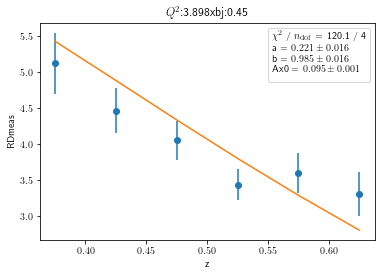

<Figure size 432x288 with 0 Axes>

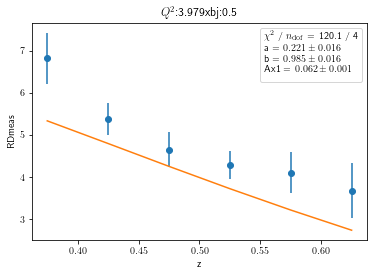

<Figure size 432x288 with 0 Axes>

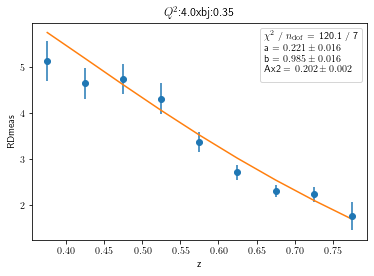

<Figure size 432x288 with 0 Axes>

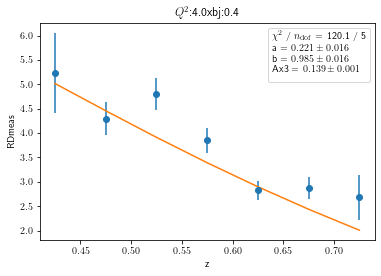

<Figure size 432x288 with 0 Axes>

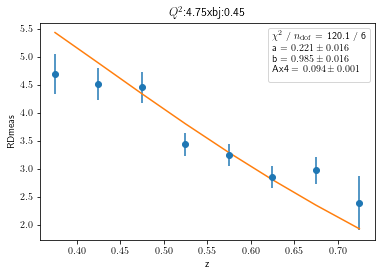

<Figure size 432x288 with 0 Axes>

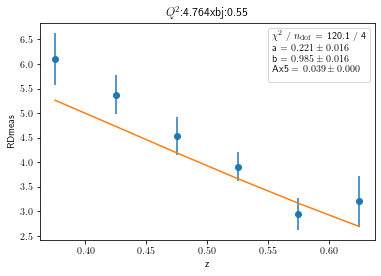

<Figure size 432x288 with 0 Axes>

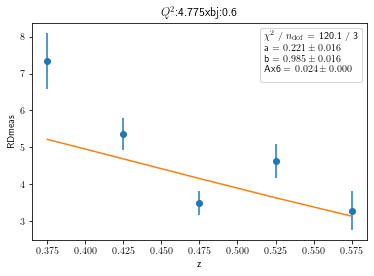

<Figure size 432x288 with 0 Axes>

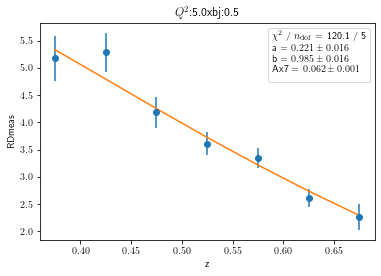

<Figure size 432x288 with 0 Axes>

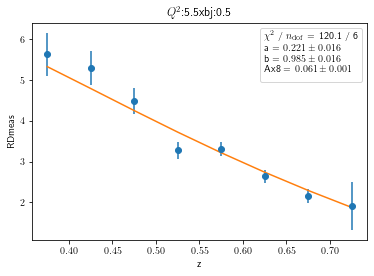

<Figure size 432x288 with 0 Axes>

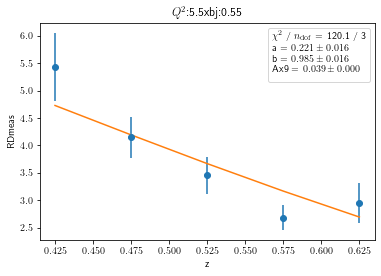

In [9]:
from iminuit.cost import UnbinnedNLL
from iminuit.util import make_with_signature, describe


with open('yield_ratio_weighted.json') as j_ratio:
    yield_ratio = json.load(j_ratio)
Parameters=[]
yield_ratios=[]
yield_ratio_errors=[]
data_zs=[]
title=[]
for keyQ2, value_Q2 in yield_ratio.items():
    print()
    Q2 = float(keyQ2)
    Q = math.sqrt(Q2)
    print(str(Q2)+':',end = '')
    for keyxbj,value_Q2xbj in value_Q2.items():
        xbj=float(keyxbj)
        print(str(xbj)+',',end = '')
        zs=[]
        yield_ratio=[]
        yield_ratio_error=[]
        NoCSV_Axi = NoCSV_Ax(xbj,Q,p_cteq6)
        print(str(NoCSV_Axi)+'NoCSV_Axi,',end = '')
        for keyz,value_Q2xbjz in value_Q2xbj.items():
            z_ratio=float(keyz)
            zs.append(z_ratio)
            yield_ratio.append(value_Q2xbjz["value_ratio"])
            yield_ratio_error.append(value_Q2xbjz["error_ratio"])
        #plt.errorbar(zs,yield_ratio,yield_ratio_error,fmt='o')
        data_zs.append(zs)
        Parameters.append(NoCSV_Axi)
        yield_ratios.append(yield_ratio)
        yield_ratio_errors.append(yield_ratio_error)
        title.append(f"$Q^2$:"+str(Q2) +"xbj:"+str(xbj))
Ax_strs=[]
Ax_is = []
least_squares = 0
for i in range(10):
    Ax_str = "Ax"+str(i)
    Ax_i = make_with_signature(RDmeas_noCSV,Ax = Ax_str)
    Ax_strs.append(Ax_str)
    Ax_is.append(Ax_i)
    least_squares += LeastSquares(data_zs[i],yield_ratios[i],yield_ratio_errors[i],Ax_i)

#least_squares = LeastSquares(data_zs[0],yield_ratios[0],yield_ratio_errors[0],Ax0)+LeastSquares(data_zs[1],yield_ratios[1],yield_ratio_errors[1],Ax1)+LeastSquares(data_zs[2],yield_ratios[2],yield_ratio_errors[2],Ax2)+LeastSquares(data_zs[3],yield_ratios[3],yield_ratio_errors[3],Ax3)
#m=Minuit(least_squares,a=0,b=0,Ax0=NoCSV_Axs[0],Ax1=NoCSV_Axs[1],Ax2=NoCSV_Axs[2],Ax3=NoCSV_Axs[3])
#print(least_squares)
#m=Minuit(least_squares,Parameters)
m=Minuit(least_squares,0,0,Parameters[0],Parameters[1],Parameters[2],Parameters[3],Parameters[4],Parameters[5],Parameters[6],Parameters[7],Parameters[8],Parameters[9])
for i in range(10):
    m.fixed[Ax_strs[i]] = True
m.migrad()
m.hesse()
print(*m.values)

for i in range(10):
    fig = plt.figure()
    fig,ax = plt.subplots()
    plt.errorbar(data_zs[i],yield_ratios[i],yield_ratio_errors[i],fmt='o')
    plt.title(title[i])
    ax.set_xlabel('z')
    ax.set_ylabel('RDmeas')
    fit_RDmeas=[]
    for zi in data_zs[i]:
            fit_RDmeas.append(RDmeas_noCSV(zi,m.values[0],m.values[1],m.values[i+2]))
    fit_info = [
            f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m.fval:.1f} / {len(data_zs[i]) - m.nfit}",
        ]
    fit_info.append(f"{m.parameters[0]} = ${m.values[0]:.3f} \\pm {m.errors[0]:.3f}$")
    fit_info.append(f"{m.parameters[1]} = ${m.values[1]:.3f} \\pm {m.errors[1]:.3f}$")
    #fit_info.append(f"{m.parameters[2]} = ${m.values[2]:.3f} \\pm {m.errors[2]:.3f}$")
    fit_info.append(f"{m.parameters[i+2]} = ${m.values[i+2]:.3f} \\pm {m.errors[i+2]:.3f}$")
    
    plt.legend(title="\n".join(fit_info))    
    plt.plot(data_zs[i],fit_RDmeas,label = "fit")
    

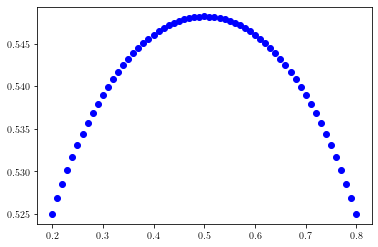

In [10]:
def RDmeas_noCSV(z_had,a,b,c,Ax):
    #delta_z = a+b*z_had
    #delta_z = a+b*z_had/(1+z_had)
    delta_z = a*z_had**b*(1-z_had)**c
    return (5*delta_z)/(1-delta_z)+Ax*(1+delta_z)/(1-delta_z)
x = np.arange(0.2,0.8,0.01)
y = RDmeas_noCSV(x,0.1,0.1,0.1,0.06)
plt.plot(x,y,"bo")

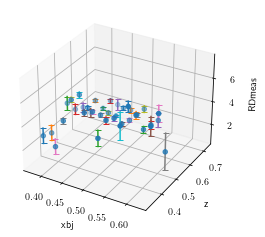

<Figure size 432x288 with 0 Axes>

In [11]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
with open('yield_ratio_xz_combined_weighted.json') as j_RD:
    RDxz = json.load(j_RD)
zs = []
xs = []
RDs = []
RDs_error = []
for key_xbj,xbj_value in RDxz["5.500000"].items():
    xbj = float(key_xbj) 
    for key_z,z_value in xbj_value.items():
        xs.append(xbj)
        z_hadron = float(key_z)
        zs.append(z_hadron)
        RD=float(z_value["value_ratio"])
        RD_error = float(z_value["error_ratio"])
        RDs.append(float(z_value["value_ratio"]))
        RDs_error.append(float(z_value["error_ratio"]))
        ax.plot([xbj,xbj],[z_hadron,z_hadron],[RD+RD_error,RD-RD_error],marker="_")
ax.scatter(xs,zs,RDs)
ax.set_xlabel("xbj")
ax.set_ylabel("z")
ax.set_zlabel("RDmeas")
plt.show()
plt.savefig("RD_xbj_z")

In [12]:
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode()
trace = go.Scatter3d(
  x=zs,
  y=xs,
  z=RDs,
    mode='markers',
    marker={
        'size':10,
        'opacity':0.8,
    }
)
layout = go.Layout(
margin={'l':0,'r':0,'b':0,'t':0})
data = [trace]
plot_figure = go.Figure(data=data,layout=layout)
plotly.offline.iplot(plot_figure)

Text(0.5, 0, 'x')

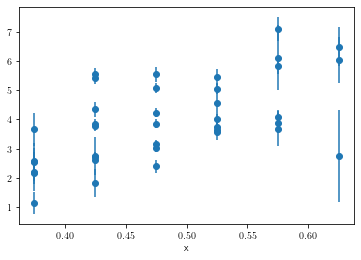

In [13]:
plt.errorbar(xs,RDs,RDs_error,fmt='o')
plt.xlabel("x")

Text(0.5, 0, 'z')

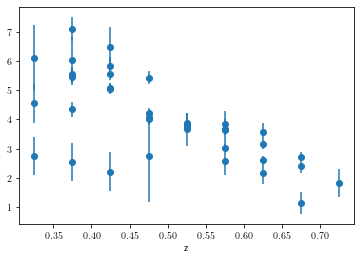

In [14]:
plt.errorbar(zs,RDs,RDs_error,fmt='o')
plt.xlabel("z")

4.0


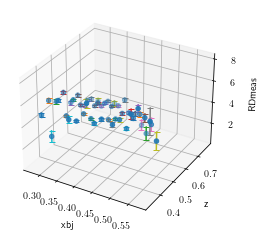

4.75


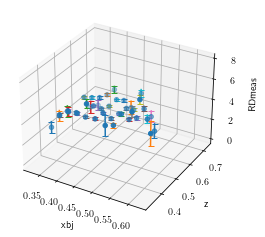

5.5


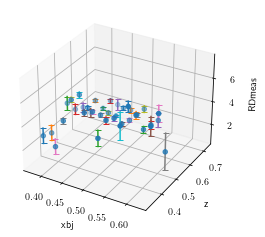

In [15]:
#with open('yield_ratio_xz_combined_weighted.json') as j_RD:
#    RDxz = json.load(j_RD)

for key_Q2,Q2_value in RDxz.items():
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    zs = []
    xs = []
    RDs = []
    RDs_error = []
    Q2 = float(key_Q2)
    print(Q2)
    for key_xbj,xbj_value in Q2_value.items():
        xbj = float(key_xbj) 
        for key_z,z_value in xbj_value.items():
            xs.append(xbj)
            z_hadron = float(key_z)
            zs.append(z_hadron)
            RD=float(z_value["value_ratio"])
            RD_error = float(z_value["error_ratio"])
            RDs.append(float(z_value["value_ratio"]))
            RDs_error.append(float(z_value["error_ratio"]))
            ax.plot([xbj,xbj],[z_hadron,z_hadron],[RD+RD_error,RD-RD_error],marker="_")
    ax.scatter(xs,zs,RDs)
    ax.set_xlabel("xbj")
    ax.set_ylabel("z")
    ax.set_zlabel("RDmeas")
    plt.show()

In [16]:
#init = [0.7,-0.61,0,0]
#init = [-0.04,-0.65,2.5,0.5]
#init = [0.73,-0.61,1.3,0]
init = [-0.03016274,-2.54547838,0.79468943,1.78784309]

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_49520/727223162.py:55: IMinuitWarning:

errordef not set, using 1 (appropriate for least-squares)

No handles with labels found to put in legend.


0.0796524992700885 -2.2492817099393476 0.903603145203463 1.375463753170363
['$\\chi^2$ / $n_\\mathrm{dof}$ = 769.1 / 45']


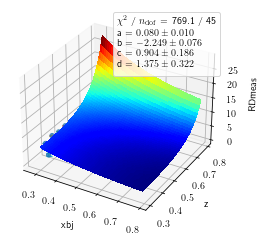

In [17]:

from iminuit import Minuit
def Bx(xbj,Q,p_cteq6):
    return 5*(p_cteq6.xfxQ(-2,xbj,Q)+p_cteq6.xfxQ(-1,xbj,Q))/(p_cteq6.xfxQ(1,xbj,Q)+p_cteq6.xfxQ(2,xbj,Q))
def Ax(xbj,Q,p_cteq6):
    return -4/(3*(p_cteq6.xfxQ(2,xbj,Q)+p_cteq6.xfxQ(1,xbj,Q)))
def RDmeas_CSV(Q,z_had,a,b,xbj,c,d):
    #delta_z = a+b*z_had
    #delta_z = a+b*z_had/(1+z_had)
    #delta_z = z_had**a*(1-z_had)**b
    delta_z = z_had**a*(1+z_had)**b
    Dz = (1-delta_z)/(1+delta_z)
    CSVx = (1-xbj)**c*xbj**d 
    Bx = 2.5+5*(p_cteq6.xfxQ(-2,xbj,Q)+p_cteq6.xfxQ(-1,xbj,Q))/(p_cteq6.xfxQ(1,xbj,Q)+p_cteq6.xfxQ(2,xbj,Q))
    Ax = -4/(3*(p_cteq6.xfxQ(2,xbj,Q)+p_cteq6.xfxQ(1,xbj,Q)))
    return (Bx-Ax*CSVx)/Dz-2.5
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
#with open('yield_ratio_xz_combined_weighted.json') as j_RD:
#    RDxz = json.load(j_RD)
zs = []
xs = []
RDs = []
RDs_error = []

for key_xbj,xbj_value in RDxz["4.000000"].items():
    xbj = float(key_xbj) 
    for key_z,z_value in xbj_value.items():
        xs.append(xbj)
        z_hadron = float(key_z)
        zs.append(z_hadron)
        RD=float(z_value["value_ratio"])
        RD_error = float(z_value["error_ratio"])
        RDs.append(float(z_value["value_ratio"]))
        RDs_error.append(float(z_value["error_ratio"]))
        ax.plot([xbj,xbj],[z_hadron,z_hadron],[RD+RD_error,RD-RD_error],marker="_")
        
ax.scatter(xs,zs,RDs)
ax.set_xlabel("xbj")
ax.set_ylabel("z")
ax.set_zlabel("RDmeas")
def least_squares_Q2(a,b,c,d):
    least_square = 0
    for key_xbj,xbj_value in RDxz["4.000000"].items():
        xbj = float(key_xbj) 
        Q = 2
        for key_z,z_value in xbj_value.items():
            z_hadron = float(key_z)
            RD=float(z_value["value_ratio"])
            RD_error = float(z_value["error_ratio"])
            least_square += (RD-RDmeas_CSV(Q,z_hadron,a,b,xbj,c,d)) ** 2 / RD_error**2
    return least_square
m_Q2 = Minuit(least_squares_Q2,a = init[0],b = init[1],c = init[2],d = init[3])
#m_Q2 = Minuit(least_squares_Q2,a = 0.7,b = -0.61,c = 0,d = 0)
#m_Q2 = Minuit(least_squares_Q2,0.73,-0.61,0.1,0.1,error_a = 0.05,error_b = 0.05,errordef=1)
m_Q2.migrad()
m_Q2.hesse()
print(*m_Q2.values)
#print(m_Q2.values["a"])
a = m_Q2.values["a"]
b = m_Q2.values["b"]
c = m_Q2.values["c"]
d = m_Q2.values["d"]

x = np.arange(0.3,0.8,0.01)
y = np.arange(0.3,0.8,0.01)
#x = np.array(xs)
#y = np.array(zs)
fit_RDmeas=[]
for xbj in x:
    fit_RDmeas_zi = []
    for zi in y:
        #fit_RDmeas_zi.append()
        fit_RDmeas.append(RDmeas_CSV(2,zi,a,b,xbj,c,d))
X,Y = np.meshgrid(x,y)
Z = np.reshape(fit_RDmeas,X.shape)
ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap=plt.cm.jet,linewidth=0,antialiased=False)
#plt.plot(zs,fit_RDmeas,label = "fit")
#print(xs) 
#print(zs)
fit_info = [
    f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m_Q2.fval:.1f} / {len(zs) - m_Q2.nfit}",
]
print(fit_info)
for p, v, e in zip(m_Q2.parameters, m_Q2.values, m_Q2.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
plt.legend(title="\n".join(fit_info))

     
plt.show()

In [18]:
#m_Q2.draw_mncontour("a","b")
#m_Q2.draw_mnprofile("a")
           

In [19]:
#m_Q2.draw_mncontour("c","d")

In [20]:
#m_Q2.draw_mncontour("a","d")

In [21]:
#m_Q2.draw_mncontour("a","c")

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_49520/2239049976.py:56: IMinuitWarning:

errordef not set, using 1 (appropriate for least-squares)

No handles with labels found to put in legend.


4.0
0.0796524992700885 -2.2492817099393476 0.903603145203463 1.375463753170363
['$\\chi^2$ / $n_\\mathrm{dof}$ = 769.1 / 45']


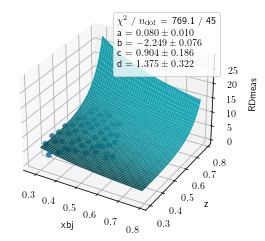

No handles with labels found to put in legend.


4.75
0.07945356380619391 -2.5441961076907447 1.2448117540933674 0.8501580827115496
['$\\chi^2$ / $n_\\mathrm{dof}$ = 240.4 / 38']


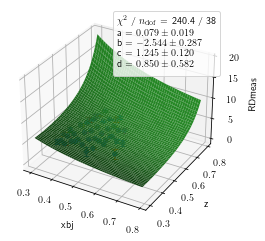

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_49520/2239049976.py:56: IMinuitWarning:

errordef not set, using 1 (appropriate for least-squares)

No handles with labels found to put in legend.


5.5
0.0245363958363476 -2.376380229856824 1.46317576019234 1.6989446931055041
['$\\chi^2$ / $n_\\mathrm{dof}$ = 225.9 / 34']


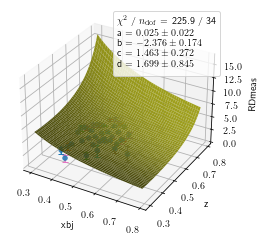

In [22]:
import math
#with open('yield_ratio_xz_combined_weighted.json') as j_RD:
#    RDxz = json.load(j_RD)
Qs = []
parameter_a = []
parameter_b = []
parameter_c = []
parameter_d = []
err_a = []
err_b = []
err_c = []
err_d = []
kaisquare = []
for key_Q2,Q2_value in RDxz.items():
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    zs = []
    xs = []
    RDs = []
    RDs_error = []
    Q2 = float(key_Q2)
    Qs.append(Q2)
    print(Q2)
    for key_xbj,xbj_value in Q2_value.items():
        xbj = float(key_xbj) 
        for key_z,z_value in xbj_value.items():
            xs.append(xbj)
            z_hadron = float(key_z)
            zs.append(z_hadron)
            RD=float(z_value["value_ratio"])
            RD_error = float(z_value["error_ratio"])
            RDs.append(float(z_value["value_ratio"]))
            RDs_error.append(float(z_value["error_ratio"]))
            ax.plot([xbj,xbj],[z_hadron,z_hadron],[RD+RD_error,RD-RD_error],marker="_")
    ax.scatter(xs,zs,RDs)
    ax.set_xlabel("xbj")
    ax.set_ylabel("z")
    ax.set_zlabel("RDmeas")
    def least_squares_Q2(a,b,c,d):
        least_square = 0
        for key_xbj,xbj_value in Q2_value.items():
            xbj = float(key_xbj) 
            Q = math.sqrt(Q2)
            for key_z,z_value in xbj_value.items():
            
                z_hadron = float(key_z)
        
                RD=float(z_value["value_ratio"])
                RD_error = float(z_value["error_ratio"])
                least_square += (RD-RDmeas_CSV(Q,z_hadron,a,b,xbj,c,d)) ** 2 / RD_error**2
        return least_square
    #m_Q2 = Minuit(least_squares_Q2,a = -0.004,b = -0.35,c = 2.5,d = 0.5)
    m_Q2 = Minuit(least_squares_Q2,a = init[0],b = init[1],c = init[2],d = init[3])
    
    #m_Q2 = Minuit(least_squares_Q2,0.73,-0.61,0.1,0.1,error_a = 0.05,error_b = 0.05,errordef=1)
    m_Q2.migrad()
    m_Q2.hesse()
    print(*m_Q2.values)
    
    #print(m_Q2.values["a"])
    a = m_Q2.values["a"]
    b = m_Q2.values["b"]
    c = m_Q2.values["c"]
    d = m_Q2.values["d"]
    parameter_a.append(a)
    parameter_b.append(b)
    parameter_c.append(c)
    parameter_d.append(d)
    err_a.append(m_Q2.errors["a"])
    err_b.append(m_Q2.errors["b"])
    err_c.append(m_Q2.errors["c"])
    err_d.append(m_Q2.errors["d"])
    kaisquare.append(m_Q2.fval)
    
    x = np.arange(0.3,0.8,0.01)
    y = np.arange(0.3,0.8,0.01)
    #x = np.array(xs)
    #y = np.array(zs)
    fit_RDmeas=[]
    for xbj in x:
        fit_RDmeas_zi = []
        for zi in y:
            #fit_RDmeas_zi.append()
            fit_RDmeas.append(RDmeas_CSV(math.sqrt(Q2),zi,a,b,xbj,c,d))
    X,Y = np.meshgrid(x,y)
    Z = np.reshape(fit_RDmeas,X.shape)
    ax.plot_surface(X,Y,Z)
    fit_info = [
    f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m_Q2.fval:.1f} / {len(zs) - m_Q2.nfit}",
    ]
    print(fit_info)
    for p, v, e in zip(m_Q2.parameters, m_Q2.values, m_Q2.errors):
        fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
    plt.legend(title="\n".join(fit_info))

    plt.show()
#print(len(Qs))

4.0


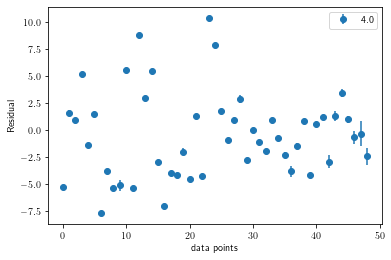

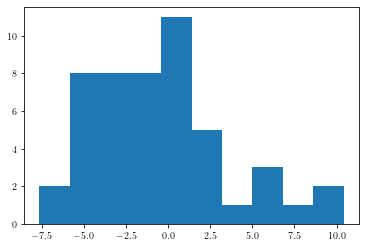

4.75


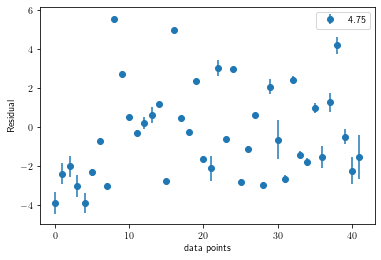

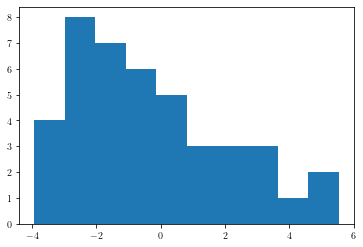

5.5


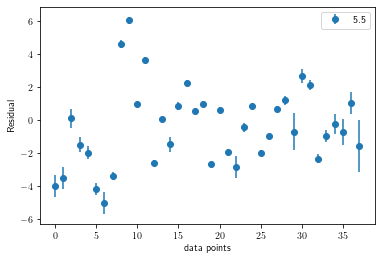

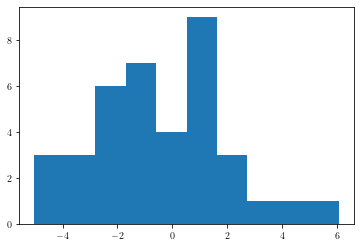

In [23]:
i_Q2 = 0
#Residual_iminuit = []
#Residual_error_iminuit = []
for key_Q2,Q2_value in RDxz.items():
    fig = plt.figure()
    
    zs = []
    xs = []
    RDs = []
    RDs_error = []
    Q2 = float(key_Q2)
    #Qs.append(Q2)
    print(Q2)
    i_count = 0
    Residual = []
    Residual_count = []
    Residual_error = []
    a = parameter_a[i_Q2]
    b = parameter_b[i_Q2]
    c = parameter_c[i_Q2]
    d = parameter_d[i_Q2]
    #print(a,',',b,',',c,',',d)
    for key_xbj,xbj_value in Q2_value.items():
        xbj = float(key_xbj) 
        for key_z,z_value in xbj_value.items():
            xs.append(xbj)
            z_hadron = float(key_z)
            zs.append(z_hadron)
            RD=float(z_value["value_ratio"])
            RD_error = float(z_value["error_ratio"])
            Residual_error.append(RD_error)
            
            RDmeas_CSV_fit = RDmeas_CSV(math.sqrt(Q2),z_hadron,a,b,xbj,c,d)
            Residual.append((RD-RDmeas_CSV_fit)/RD_error)
            Residual_count.append(i_count)
            #Residual_iminuit[i_Q2].append(Residual)
            i_count+=1
  
    #plt.plot(Residual_count,Residual,"P",label=Qs[i_Q2])
    plt.errorbar(Residual_count,Residual,Residual_error,fmt='o',label = Qs[i_Q2])
    plt.xlabel("data points")
    plt.ylabel("Residual")
    plt.legend()
    
    i_Q2+=1
    
    
    fig,ax = plt.subplots()
    #n,bins,patches = ax.hist(Residual,50,density = True)
    #ax.plot(bins,Residual)
    plt.hist(Residual,10)
    plt.show()

4.0
4.75
5.5


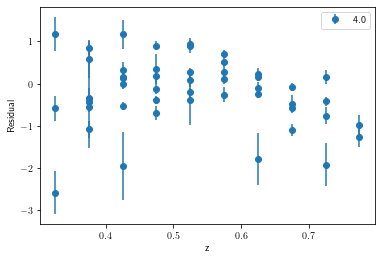

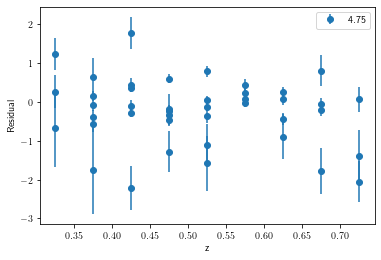

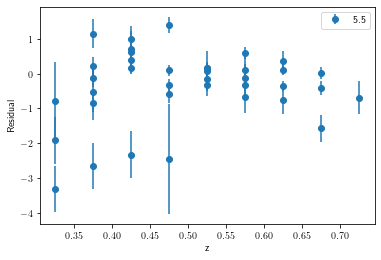

In [24]:
i_Q2 = 0

for key_Q2,Q2_value in RDxz.items():
    fig = plt.figure()
    
    zs = []
    xs = []
    RDs = []
    RDs_error = []
    Q2 = float(key_Q2)
   
    print(Q2)
    i_count = 0
    Residual = []
    Residual_count = []
    Residual_error = []
    for key_xbj,xbj_value in Q2_value.items():
        xbj = float(key_xbj) 
        for key_z,z_value in xbj_value.items():
            xs.append(xbj)
            z_hadron = float(key_z)
            zs.append(z_hadron)
            RD=float(z_value["value_ratio"])
            RD_error = float(z_value["error_ratio"])
            Residual_error.append(RD_error)
            a = parameter_a[i_Q2]
            b = parameter_b[i_Q2]
            c = parameter_c[i_Q2]
            d = parameter_d[i_Q2]
            RDmeas_CSV_fit = RDmeas_CSV(math.sqrt(Q2),z_hadron,a,b,xbj,c,d)
            Residual.append(RD-RDmeas_CSV_fit)
            #Residual_count.append(i_count)
            i_count+=1
  
    #plt.plot(Residual_count,Residual,"P",label=Qs[i_Q2])
    plt.errorbar(zs,Residual,Residual_error,fmt='o',label = Qs[i_Q2])
    plt.xlabel("z")
    plt.ylabel("Residual")
    plt.legend()
    i_Q2+=1

4.0
4.75
5.5


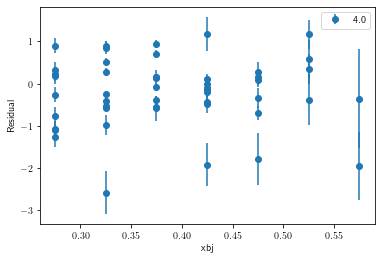

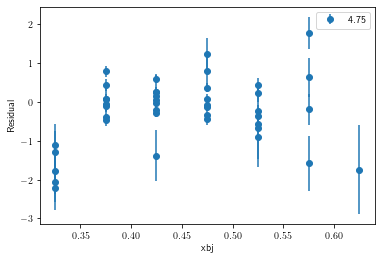

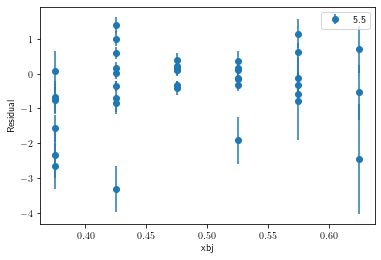

In [25]:
i_Q2 = 0

for key_Q2,Q2_value in RDxz.items():
    fig = plt.figure()
    
    zs = []
    xs = []
    RDs = []
    RDs_error = []
    Q2 = float(key_Q2)
    
    print(Q2)
    i_count = 0
    Residual = []
    Residual_count = []
    Residual_error = []
    for key_xbj,xbj_value in Q2_value.items():
        xbj = float(key_xbj) 
        for key_z,z_value in xbj_value.items():
            xs.append(xbj)
            z_hadron = float(key_z)
            zs.append(z_hadron)
            RD=float(z_value["value_ratio"])
            RD_error = float(z_value["error_ratio"])
            Residual_error.append(RD_error)
            a = parameter_a[i_Q2]
            b = parameter_b[i_Q2]
            c = parameter_c[i_Q2]
            d = parameter_d[i_Q2]
            RDmeas_CSV_fit = RDmeas_CSV(math.sqrt(Q2),z_hadron,a,b,xbj,c,d)
            Residual.append(RD-RDmeas_CSV_fit)
            #Residual_count.append(i_count)
            i_count+=1
  
    #plt.plot(Residual_count,Residual,"P",label=Qs[i_Q2])
    plt.errorbar(xs,Residual,Residual_error,fmt='o',label = Qs[i_Q2])
    plt.xlabel("xbj")
    plt.ylabel("Residual")
    plt.legend()
    i_Q2+=1

In [26]:
print(len(Qs))
print("Q2    a    b    c    d")

for i in range(len(Qs)):
    print(Qs[i],end = '')
    print(" ",end = '')
    print(f"{parameter_a[i]:.5f}"," ",f"{parameter_b[i]:.5f}"," ",f"{parameter_c[i]:.5f}"," ",f"{parameter_d[i]:.5f}"," ",f"{kaisquare[i]:.5f}")
    print(Qs[i],end = '')
    print(" ",end = '')
    print(f"{err_a[i]:.5f}"," ",f"{err_b[i]:.5f}"," ",f"{err_c[i]:.5f}"," ",f"{err_d[i]:.5f}"," ",f"{kaisquare[i]:.5f}")

3
Q2    a    b    c    d
4.0 0.07965   -2.24928   0.90360   1.37546   769.13820
4.0 0.01036   0.07586   0.18631   0.32180   769.13820
4.75 0.07945   -2.54420   1.24481   0.85016   240.44967
4.75 0.01874   0.28748   0.11983   0.58209   240.44967
5.5 0.02454   -2.37638   1.46318   1.69894   225.89452
5.5 0.02206   0.17395   0.27223   0.84528   225.89452


Text(0, 0.5, 'xbj*CSV')

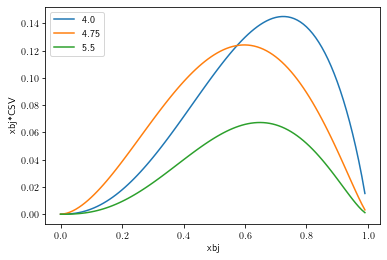

In [27]:
from iminuit.util import propagate

xbj = np.arange(0.0,1,0.01)
def CSVx(xbj,c,d):
    return (1-xbj)**c*xbj**d


plt.plot(xbj,xbj*CSVx(xbj,parameter_c[0],parameter_d[0]),label=Qs[0])

plt.plot(xbj,xbj*CSVx(xbj,parameter_c[1],parameter_d[1]),label=Qs[1])
plt.plot(xbj,xbj*CSVx(xbj,parameter_c[2],parameter_d[2]),label=Qs[2])
#plt.plot(xbj,xbj*CSVx(xbj,parameter_c[3],parameter_d[3]),label=Qs[3])
plt.legend()
#plt.ylim(0,0.02)
plt.xlabel("xbj")
plt.ylabel("xbj*CSV")

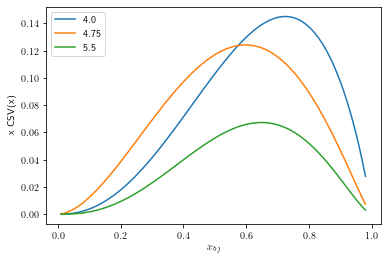

In [28]:
for i in range(len(Qs)):
    x = np.arange(0.01,0.99,0.01)
    fit_CSV=[]
    for xbj in x:
        fit_CSV.append(xbj*CSVx(xbj,parameter_c[i],parameter_d[i]))
    plt.plot(x,fit_CSV,label = Qs[i]);        
#plt.ylim(0,0.2)
plt.xlabel(r'$x_{bj}$')
plt.ylabel("x CSV(x)")

#plt.plot([0.75,0.75],[0,0.2],'k-')
#plt.plot([0.35,0.35],[0,0.2],'k-')
plt.legend()

Text(0, 0.5, 'x CSV(x)')

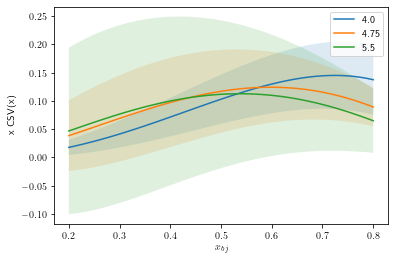

In [29]:
from iminuit.util import propagate
#xbj = np.linspace(0.01,0.99,100)
xbj = np.linspace(0.2,0.8,100)
def CSVx(xbj,c,d):
    return (1-xbj)**c*xbj**d

upper0=np.linspace(0,0,100)
xbjCSVx0=np.linspace(0,0,100)
for i_c in np.arange(-err_c[0],err_c[0],0.01):
    for i_d in np.arange(-err_d[0],err_d[0],0.01):
        for i in range(len(xbj)):
            xbjCSVx0[i]=xbj[i]*CSVx(xbj[i],parameter_c[0],parameter_d[0])   
            diff0 = xbj[i]*CSVx(xbj[i],parameter_c[0]+i_c,parameter_d[0]+i_d)-xbjCSVx0[i]  
            upper0[i]=max(upper0[i],abs(diff0))
plt.plot(xbj,xbjCSVx0,label=Qs[0])
plt.fill_between(xbj,xbjCSVx0+upper0,xbjCSVx0-upper0,alpha = 0.15)

upper1=np.linspace(0,0,100)
xbjCSVx1=np.linspace(0,0,100)
for i_c in np.arange(-err_c[1],err_c[1],0.01):
    for i_d in np.arange(-err_d[1],err_d[1],0.01):
        for i in range(len(xbj)):          
            xbjCSVx1[i]=xbj[i]*CSVx(xbj[i],parameter_c[1],parameter_d[1])   
            diff1 = xbj[i]*CSVx(xbj[i],parameter_c[1]+i_c,parameter_d[1]+i_d)-xbjCSVx1[i]  
            upper1[i]=max(upper1[i],abs(diff1))
plt.plot(xbj,xbjCSVx1,label=Qs[1])
plt.fill_between(xbj,xbjCSVx1+upper1,xbjCSVx1-upper1,alpha = 0.15)

upper2=np.linspace(0,0,100)
xbjCSVx2=np.linspace(0,0,100)
for i_c in np.arange(-err_c[2],err_c[2],0.01):
    for i_d in np.arange(-err_d[2],err_d[2],0.01):
        for i in range(len(xbj)):              
            xbjCSVx2[i]=CSVx(xbj[i],parameter_c[2],parameter_d[2])   
            #xbjCSVx2[i]=xbj[i]*CSVx(xbj[i],parameter_c[2],parameter_d[2]) 
            diff2 = CSVx(xbj[i],parameter_c[2]+i_c,parameter_d[2]+i_d)-xbjCSVx2[i]  
            #diff2 = xbj[i]*CSVx(xbj[i],parameter_c[2]+i_c,parameter_d[2]+i_d)-xbjCSVx2[i] 
            upper2[i]=max(upper2[i],abs(diff2))
plt.plot(xbj,xbjCSVx2,label=Qs[2])
plt.fill_between(xbj,xbjCSVx2+upper2,xbjCSVx2-upper2,alpha = 0.15)

plt.legend()
plt.xlabel(r"$x_{bj}$")
plt.ylabel(r"x CSV(x)")

Text(0, 0.5, 'deltaz')

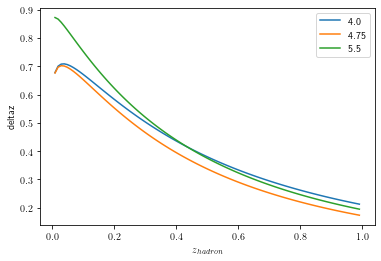

In [30]:
fig = plt.figure()
ax = fig.add_subplot()
zs = np.linspace(0.01,0.99,100)
#zs = np.linspace(0.1,0.8,100)
def delta_z(z_had,a,b):
    return z_had**a*(1+z_had)**b
upper0=np.linspace(0,0,100)
Dz0=np.linspace(0,0,100)
for i_a in np.arange(-err_a[0],err_a[0],0.001):
    for i_b in np.arange(-err_b[0],err_b[0],0.001):
        for i in range(len(zs)):
            Dz0[i]=delta_z(zs[i],parameter_a[0],parameter_b[0])   
            diff0 = delta_z(zs[i],parameter_a[0]+i_a,parameter_b[0]+i_b)-Dz0[i]  
            upper0[i]=max(upper0[i],abs(diff0))
#plt.yscale('log')
plt.plot(zs,Dz0,label=Qs[0])
#plt.fill_between(zs,Dz0+upper0,Dz0-upper0,alpha = 0.15)

upper1=np.linspace(0,0,100)
Dz1=np.linspace(0,0,100)
for i_a in np.arange(-err_a[1],err_a[1],0.001):
    for i_b in np.arange(-err_b[1],err_b[1],0.001):
        for i in range(len(zs)):
            Dz1[i]=delta_z(zs[i],parameter_a[1],parameter_b[1])   
            diff1 = delta_z(zs[i],parameter_a[1]+i_a,parameter_b[1]+i_b)-Dz1[i]  
            upper1[i]=max(upper1[i],abs(diff1))
plt.plot(zs,Dz1,label=Qs[1])
#plt.fill_between(zs,Dz1+upper1,Dz1-upper1,alpha = 0.15)

upper2=np.linspace(0,0,100)
Dz2=np.linspace(0,0,100)
for i_a in np.arange(-err_a[2],err_a[2],0.001):
    for i_b in np.arange(-err_b[2],err_b[2],0.001):
        for i in range(len(zs)):
            Dz2[i]=delta_z(zs[i],parameter_a[2],parameter_b[2])   
            diff2 = delta_z(zs[i],parameter_a[2]+i_a,parameter_b[2]+i_b)-Dz2[i]  
            upper2[i]=max(upper2[i],abs(diff2))
plt.plot(zs,Dz2,label=Qs[2])
#plt.fill_between(zs,Dz2+upper2,Dz2-upper2,alpha = 0.15)

#ax.set_yscale("log")
#ax.set_xscale("log")

plt.legend()
plt.xlabel(r"$z_{hadron}$")
plt.ylabel("deltaz")

[ 0.02452384 -2.37669612  1.4632948   1.69831449]


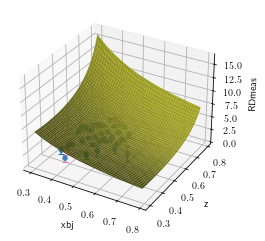

In [31]:
from scipy.optimize import minimize
import scipy.integrate as integr
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
with open('yield_ratio_xz_combined_weighted.json') as j_RD:
    RDxz = json.load(j_RD)
zs = []
xs = []
RDs = []
RDs_error = []

Q2 = 5.5
Q = math.sqrt(5.5)

for key_xbj,xbj_value in RDxz["5.500000"].items():
    xbj = float(key_xbj) 
    for key_z,z_value in xbj_value.items():
        xs.append(xbj)
        z_hadron = float(key_z)
        zs.append(z_hadron)
        RD=float(z_value["value_ratio"])
        RD_error = float(z_value["error_ratio"])
        RDs.append(float(z_value["value_ratio"]))
        RDs_error.append(float(z_value["error_ratio"]))
        ax.plot([xbj,xbj],[z_hadron,z_hadron],[RD+RD_error,RD-RD_error],marker="_")
        
ax.scatter(xs,zs,RDs)
ax.set_xlabel("xbj")
ax.set_ylabel("z")
ax.set_zlabel("RDmeas")

def CSV_Constr_fun(params):
    integral = integr.quad( CSVx, 0, 1, args=(params))
    return integral

def least_squares_scipy(params,Q,xs,zs,RD,RD_error):
    least_square = 0
    #Q = math.sqrt(5.5)
    ai = params[0]
    bi = params[1]
    ci = params[2]
    di = params[3]
    for i in range(len(xs)):
        least_square += (RDs[i]-RDmeas_CSV(Q,zs[i],ai,bi,xs[i],ci,di)) ** 2 / RD_error[i]**2
    return least_square
#print(len(xs))
#print(len(zs))
#print(len(RDs))
#print(len(RDs_error))

res1 = minimize(least_squares_scipy,x0 = [init[0],init[1],init[2],init[3]],args = (Q,xs,zs,RDs,RDs_error))
#,constraints = cons)
parameters1 = res1.x
print(parameters1)
a_scipy = parameters1[0]
b_scipy = parameters1[1]
c_scipy = parameters1[2]
d_scipy = parameters1[3]
#print(a)
x = np.arange(0.3,0.8,0.01)
y = np.arange(0.3,0.8,0.01)
#x = np.array(xs)
#y = np.array(zs)
fit_RDmeas=[]
for xbj in x:
    fit_RDmeas_zi = []
    for zi in y:
        #fit_RDmeas_zi.append()
        fit_RDmeas.append(RDmeas_CSV(Q,zi,a_scipy,b_scipy,xbj,c_scipy,d_scipy))
X,Y = np.meshgrid(x,y)
Z = np.reshape(fit_RDmeas,X.shape)
ax.plot_surface(X,Y,Z)
#,rstride=1,cstride=1,cmap=plt.cm.jet,linewidth=0,antialiased=False)

##with constraints
#cons = {'type': 'eq','fun': CSV_Constr_fun}
#res2 = minimize(least_squares_Q2,x0 = [0.7,-0.6,1.3,0],args = (Q,xs,zs,RDs,RDs_error),constraints = cons )
#parameters2 = res2.x
#print(parameters2)
#a2 = parameters2[0]
#b2 = parameters2[1]
#c2 = parameters2[2]
#d2 = parameters2[3]
#RDmeas_fit2 = RDmeas_CSV()

0.024523843818872203
-2.376696122629062
1.4632948045478438
1.6983144926022926
5.5


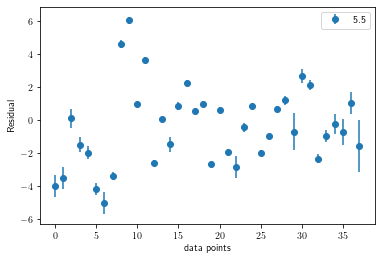

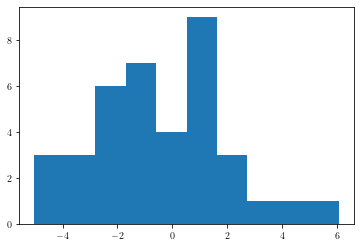

In [32]:
i_scipy = 0
zs_scipy = []
Residual_scipy = []
Residual_count_scipy = []
Residual_error_scipy = []
#a_scipy = parameters1[0]
#b_scipy = parameters1[1]
#c_scipy = parameters1[2]
#d_scipy = parameters1[3]
print(a_scipy)
print(b_scipy)
print(c_scipy)
print(d_scipy)
print(Q2)
for key_xbj,xbj_value in RDxz["5.500000"].items():
    xbj = float(key_xbj) 
    for key_z,z_value in xbj_value.items():
        xs.append(xbj)
        z_hadron = float(key_z)
        zs_scipy.append(z_hadron)
        RD=float(z_value["value_ratio"])
        RD_error = float(z_value["error_ratio"])
        Residual_error_scipy.append(RD_error)
        RDmeas_CSV_fit = RDmeas_CSV(math.sqrt(Q2),z_hadron,a_scipy,b_scipy,xbj,c_scipy,d_scipy)
        Residual_scipy.append((RD-RDmeas_CSV_fit)/RD_error)
        Residual_count_scipy.append(i_scipy)
        i_scipy+=1
  #plt.plot(Residual_count,Residual,"P",label=Qs[i_Q2])
plt.errorbar(Residual_count_scipy,Residual_scipy,Residual_error_scipy,fmt='o',label = '5.5')
plt.xlabel("data points")
plt.ylabel("Residual")
plt.legend()
fig,ax = plt.subplots()
plt.hist(Residual_scipy,10)
plt.show()

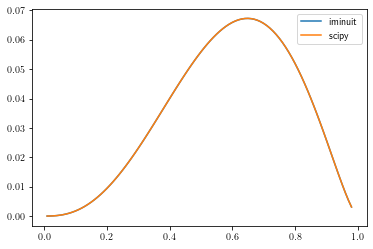

In [33]:
xbj = np.arange(0.01,0.99,0.01)
def CSVx(xbj,c,d):
    return (1-xbj)**c*xbj**d

plt.plot(xbj,xbj*CSVx(xbj,parameter_c[2],parameter_d[2]),label='iminuit')
plt.plot(xbj,xbj*CSVx(xbj,c_scipy,d_scipy),label='scipy')
#plt.plot(xbj,xbj*CSVx(xbj,c2,d2),label='scripy_csvconstr')


plt.legend()

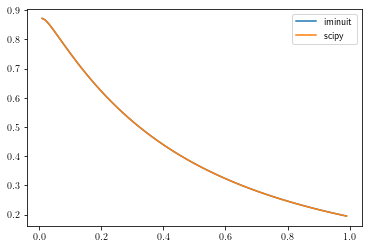

In [34]:
zs = np.linspace(0.01,0.99,100)
#zs = np.linspace(0.1,0.8,100)
def delta_z(z_had,a,b):
    return z_had**a*(1+z_had)**b

plt.plot(zs,delta_z(zs,parameter_a[2],parameter_b[2]),label='iminuit')
plt.plot(zs,delta_z(zs,a_scipy,b_scipy),label='scipy')
#plt.plot(zs,delta_z(zs,a2,b2),label='scipy_csvconstr')
plt.legend()

[ 0.07981544 -2.24345448  0.99901087  1.38424442]
[ 0.07947425 -2.54428988  1.28531663  0.84929749]
[ 0.02452384 -2.37669612  1.4632948   1.69831449]


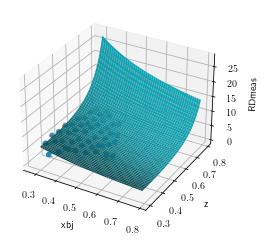

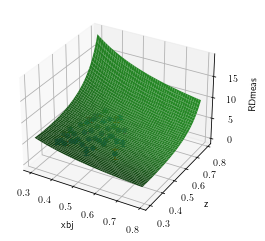

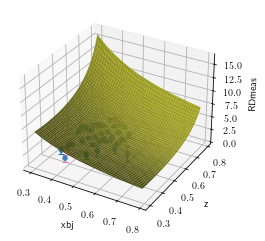

In [35]:
def CSV_Constr_fun(params):
    integral = integr.quad( CSVx, 0, 1, args=(params))
    return integral

def least_squares_scipy(params,Q,xs,zs,RD,RD_error):
    least_square = 0
    #Q = math.sqrt(5.5)
    ai = params[0]
    bi = params[1]
    ci = params[2]
    di = params[3]
    for i in range(len(xs)):
        least_square += (RDs[i]-RDmeas_CSV(Q,zs[i],ai,bi,xs[i],ci,di)) ** 2 / RD_error[i]**2
    return least_square
parametera_scipy = []
parameterb_scipy = []
parameterc_scipy = []
parameterd_scipy = []

for key_Q2,Q2_value in RDxz.items():
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')

    zs = []
    xs = []
    RDs = []
    RDs_error = []
    Q2 = float(key_Q2)

    for key_xbj,xbj_value in Q2_value.items():
        xbj = float(key_xbj) 
        for key_z,z_value in xbj_value.items():
            xs.append(xbj)
            z_hadron = float(key_z)
            zs.append(z_hadron)
            RD=float(z_value["value_ratio"])
            RD_error = float(z_value["error_ratio"])
            RDs.append(float(z_value["value_ratio"]))
            RDs_error.append(float(z_value["error_ratio"]))
            ax.plot([xbj,xbj],[z_hadron,z_hadron],[RD+RD_error,RD-RD_error],marker="_")
        
    ax.scatter(xs,zs,RDs)
    ax.set_xlabel("xbj")
    ax.set_ylabel("z")
    ax.set_zlabel("RDmeas")


    res1 = minimize(least_squares_scipy,x0 = [init[0],init[1],init[2],init[3]],args = (Q,xs,zs,RDs,RDs_error))
    #,constraints = cons)
    parameters1 = res1.x
    print(parameters1)
    a_scipy = parameters1[0]
    b_scipy = parameters1[1]
    c_scipy = parameters1[2]
    d_scipy = parameters1[3]
    parametera_scipy.append(a_scipy)
    parameterb_scipy.append(b_scipy)
    parameterc_scipy.append(c_scipy)
    parameterd_scipy.append(d_scipy)
    #print(a)
    x = np.arange(0.3,0.8,0.01)
    y = np.arange(0.3,0.8,0.01)
    #x = np.array(xs)
    #y = np.array(zs)
    fit_RDmeas=[]
    for xbj in x:
        fit_RDmeas_zi = []
        for zi in y:
            #fit_RDmeas_zi.append()
            fit_RDmeas.append(RDmeas_CSV(Q,zi,a_scipy,b_scipy,xbj,c_scipy,d_scipy))
    X,Y = np.meshgrid(x,y)
    Z = np.reshape(fit_RDmeas,X.shape)
    ax.plot_surface(X,Y,Z)

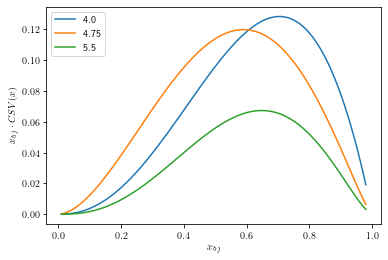

In [36]:
for i in range(len(Qs)):
    x = np.arange(0.01,0.99,0.01)
    fit_CSV=[]
    for xbj in x:
        fit_CSV.append(xbj*CSVx(xbj,parameterc_scipy[i],parameterd_scipy[i]))
    plt.plot(x,fit_CSV,label = Qs[i]);        
#plt.ylim(0,0.2)
plt.xlabel(r'$x_{bj}$')
plt.ylabel(r"$x_{bj} \cdot CSV(x)$")
plt.legend()

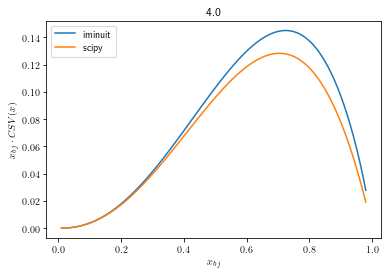

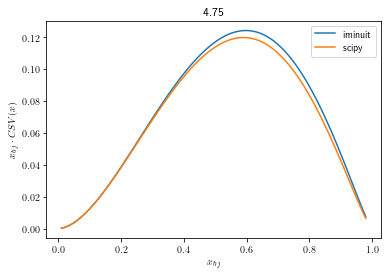

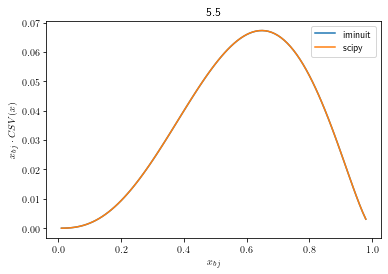

In [37]:
for i in range(len(Qs)):
    fig=plt.figure()
    ax = fig.add_subplot()
    x = np.arange(0.01,0.99,0.01)
    fit_CSV_scipy=[]
    fit_CSV_iminuit = []
    for xbj in x:
        fit_CSV_iminuit.append(xbj*CSVx(xbj,parameter_c[i],parameter_d[i]))
        fit_CSV_scipy.append(xbj*CSVx(xbj,parameterc_scipy[i],parameterd_scipy[i]))
    #print(i)
    plt.plot(x,fit_CSV_iminuit,label = 'iminuit')
    plt.plot(x,fit_CSV_scipy,label = 'scipy')
    #plt.ylim(0,0.2)
    plt.xlabel(r'$x_{bj}$')
    plt.ylabel(r"$x_{bj} \cdot CSV(x)$")
    ax.set_title(Qs[i])
    plt.legend()